<a href="https://colab.research.google.com/github/tjsgn616/Project/blob/main/%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80_%ED%92%8D%ED%96%A5_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
seoul2018 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/SURFACE_ASOS_108_HR_2018_2018_2019.csv", encoding='cp949')
seoul2019 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/SURFACE_ASOS_108_HR_2019_2019_2020.csv", encoding='cp949')
seoul2020 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/SURFACE_ASOS_108_HR_2020_2020_2021.csv", encoding='cp949')
seoul2021 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/SURFACE_ASOS_108_HR_2021_2021_2022.csv", encoding='cp949')

In [ ]:
mi2018 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/ENV_YDST_108_HR_2018_2018_2019.csv", encoding='cp949')
mi2019 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/ENV_YDST_108_HR_2019_2019_2020.csv", encoding='cp949')
mi2020 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/ENV_YDST_108_HR_2020_2020_2021.csv", encoding='cp949')
mi2021 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dust/seoul/ENV_YDST_108_HR_2021_2021_2022.csv", encoding='cp949')

In [ ]:
seoul2018.columns
mi2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8552 entries, 0 to 8551
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   지점                 8552 non-null   int64  
 1   일시                 8552 non-null   object 
 2   1시간평균 미세먼지농도(㎍/㎥)  8199 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 200.6+ KB


In [ ]:
se18 = seoul2018[['일시','풍속(m/s)','풍향(16방위)']]
se19 = seoul2019[['일시','풍속(m/s)','풍향(16방위)']]
se20 = seoul2020[['일시','풍속(m/s)','풍향(16방위)']]
se21 = seoul2021[['일시','풍속(m/s)','풍향(16방위)']]

In [ ]:
mi18 = mi2018.iloc[:,1:]
mi19 = mi2019.iloc[:,1:]
mi20 = mi2020.iloc[:,1:]
mi21 = mi2021.iloc[:,1:]

### 풍속 데이터와 미세먼지 데이터 조인

In [ ]:
data18 = pd.merge(se18, mi18, "left", on="일시")
data19 = pd.merge(se19, mi19, "left", on="일시")
data20 = pd.merge(se20, mi20, "left", on="일시")
data21 = pd.merge(se21, mi21, "left", on="일시")

### 결측치 확인
- 풍속과 관련해서는 결측치가 별루 없음
- 미세먼지에 관해서 결측치가 많이 존재함 -> 그날 하루 평균으로 값을 처리

In [ ]:
print(data18.isnull().sum(), data19.isnull().sum(),data20.isnull().sum(),data21.isnull().sum())

일시                     0
풍속(m/s)                2
풍향(16방위)               2
1시간평균 미세먼지농도(㎍/㎥)    859
dtype: int64 일시                     0
풍속(m/s)                7
풍향(16방위)               7
1시간평균 미세먼지농도(㎍/㎥)    561
dtype: int64 일시                      0
풍속(m/s)                 0
풍향(16방위)                0
1시간평균 미세먼지농도(㎍/㎥)    1174
dtype: int64 일시                     0
풍속(m/s)                2
풍향(16방위)               2
1시간평균 미세먼지농도(㎍/㎥)    374
dtype: int64


In [ ]:
data18.iloc[979:985]

,일시,풍속(m/s),풍향(16방위),1시간평균 미세먼지농도(㎍/㎥)
979,2018-02-10 19:00,5.1,290.0,5.0
980,2018-02-10 20:00,5.8,290.0,NaN
981,2018-02-10 21:00,4.1,290.0,19.0
982,2018-02-10 22:00,3.5,270.0,20.0
983,2018-02-10 23:00,2.1,290.0,28.0
984,2018-02-11 00:00,2.1,270.0,38.0


In [ ]:
# 결측치 처리 -> 평균값으로 가기 보다는 흐름이 있기 때문에 이전 값을 가져오는 형식으로 진행
# data18 = data18.fillna(method="ffill")
data18 = data18.fillna(data18.interpolate())

In [ ]:
data18.isnull().sum()

일시                   0
풍속(m/s)              0
풍향(16방위)             0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64

In [ ]:
data18.iloc[979:985]

,일시,풍속(m/s),풍향(16방위),1시간평균 미세먼지농도(㎍/㎥)
979,2018-02-10 19:00,5.1,290.0,5.0
980,2018-02-10 20:00,5.8,290.0,12.0
981,2018-02-10 21:00,4.1,290.0,19.0
982,2018-02-10 22:00,3.5,270.0,20.0
983,2018-02-10 23:00,2.1,290.0,28.0
984,2018-02-11 00:00,2.1,270.0,38.0


앞의 값과 뒤의 값의 평균으로 결측치 처리 완료

In [ ]:
data19 = data19.fillna(data19.interpolate())
data20 = data20.fillna(data20.interpolate())
data21 = data21.fillna(data21.interpolate())

In [ ]:
print(data18.isnull().sum(), data19.isnull().sum(),data20.isnull().sum(),data21.isnull().sum())

일시                   0
풍속(m/s)              0
풍향(16방위)             0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64 일시                   0
풍속(m/s)              0
풍향(16방위)             0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64 일시                   0
풍속(m/s)              0
풍향(16방위)             0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64 일시                   0
풍속(m/s)              0
풍향(16방위)             0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64


## 풍향을 보기 쉽게 변경
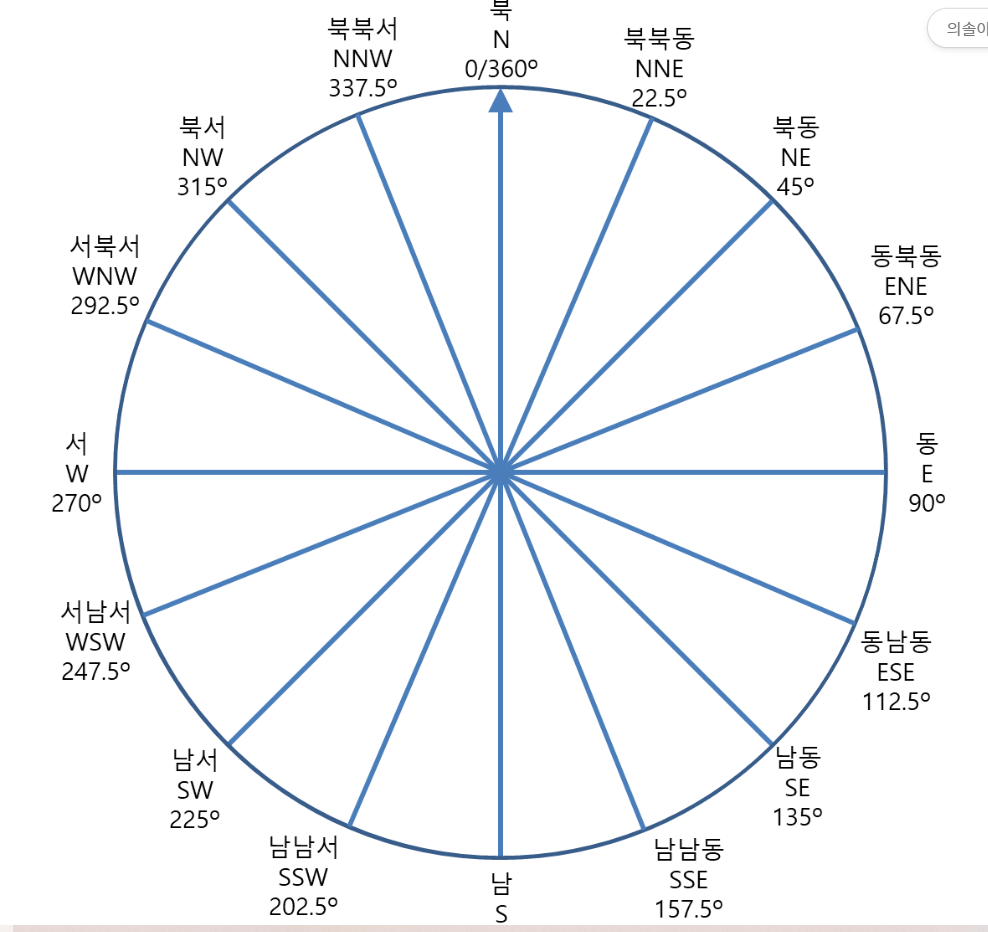

In [ ]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 8760 non-null   object 
 1   풍속(m/s)            8760 non-null   float64
 2   풍향(16방위)           8760 non-null   float64
 3   1시간평균 미세먼지농도(㎍/㎥)  8760 non-null   float64
dtypes: float64(3), object(1)
memory usage: 342.2+ KB


In [ ]:
data18['풍향'] = data18['풍향(16방위)']
data18

KeyError: ignored

In [ ]:
data18['풍향D'] = data18['풍향(16방위)']
data18

,일시,풍속(m/s),풍향(16방위),1시간평균 미세먼지농도(㎍/㎥),풍향D
0,2018-01-01 00:00,0.5,110.0,25.0,110.0
1,2018-01-01 01:00,0.7,360.0,39.0,360.0
2,2018-01-01 02:00,0.9,270.0,30.0,270.0
3,2018-01-01 03:00,1.0,290.0,33.0,290.0
4,2018-01-01 04:00,1.1,290.0,35.0,290.0
...,...,...,...,...,...
8755,2018-12-31 19:00,2.1,270.0,55.0,270.0
8756,2018-12-31 20:00,0.8,340.0,36.0,340.0
8757,2018-12-31 21:00,1.1,290.0,38.0,290.0
8758,2018-12-31 22:00,1.3,270.0,49.0,270.0


In [ ]:
data18.loc[(data18['풍향(16방위)'] >= 0.0) & (data18['풍향(16방위)'] < 11.25) , '풍향D'] = 0
data18.loc[(data18['풍향(16방위)'] >= 11.25) & (data18['풍향(16방위)'] < 33.75) , '풍향D'] = 22.5
data18.loc[(data18['풍향(16방위)'] >= 33.75) & (data18['풍향(16방위)'] < 56.25) , '풍향D'] = 45
data18.loc[(data18['풍향(16방위)'] >= 56.25) & (data18['풍향(16방위)'] < 78.75) , '풍향D'] = 67.5
data18.loc[(data18['풍향(16방위)'] >= 78.75) & (data18['풍향(16방위)'] < 101.25) , '풍향D'] = 90
data18.loc[(data18['풍향(16방위)'] >= 101.25) & (data18['풍향(16방위)'] < 123.75) , '풍향D'] = 112.5
data18.loc[(data18['풍향(16방위)'] >= 123.75) & (data18['풍향(16방위)'] < 146.25) , '풍향D'] = 135
data18.loc[(data18['풍향(16방위)'] >= 146.25) & (data18['풍향(16방위)'] < 168.75) , '풍향D'] = 157.5
data18.loc[(data18['풍향(16방위)'] >= 168.75) & (data18['풍향(16방위)'] < 191.25) , '풍향D'] = 180
data18.loc[(data18['풍향(16방위)'] >= 191.25) & (data18['풍향(16방위)'] < 213.75) , '풍향D'] = 202.5
data18.loc[(data18['풍향(16방위)'] >= 213.75) & (data18['풍향(16방위)'] < 236.25) , '풍향D'] = 225
data18.loc[(data18['풍향(16방위)'] >= 236.25) & (data18['풍향(16방위)'] < 258.75) , '풍향D'] = 247.5
data18.loc[(data18['풍향(16방위)'] >= 258.75) & (data18['풍향(16방위)'] < 281.25) , '풍향D'] = 270
data18.loc[(data18['풍향(16방위)'] >= 281.25) & (data18['풍향(16방위)'] < 303.75) , '풍향D'] = 292.5
data18.loc[(data18['풍향(16방위)'] >= 303.75) & (data18['풍향(16방위)'] < 326.25) , '풍향D'] = 315
data18.loc[(data18['풍향(16방위)'] >= 326.25) & (data18['풍향(16방위)'] < 348.75) , '풍향D'] = 337.5
data18.loc[(data18['풍향(16방위)'] >=348.75) & (data18['풍향(16방위)'] <= 360) , '풍향D'] = 0

In [ ]:
data19.loc[(data19['풍향(16방위)'] >= 0.0) & (data19['풍향(16방위)'] < 11.25) , '풍향D'] = 0
data19.loc[(data19['풍향(16방위)'] >= 11.25) & (data19['풍향(16방위)'] < 33.75) , '풍향D'] = 22.5
data19.loc[(data19['풍향(16방위)'] >= 33.75) & (data19['풍향(16방위)'] < 56.25) , '풍향D'] = 45
data19.loc[(data19['풍향(16방위)'] >= 56.25) & (data19['풍향(16방위)'] < 78.75) , '풍향D'] = 67.5
data19.loc[(data19['풍향(16방위)'] >= 78.75) & (data19['풍향(16방위)'] < 101.25) , '풍향D'] = 90
data19.loc[(data19['풍향(16방위)'] >= 101.25) & (data19['풍향(16방위)'] < 123.75) , '풍향D'] = 112.5
data19.loc[(data19['풍향(16방위)'] >= 123.75) & (data19['풍향(16방위)'] < 146.25) , '풍향D'] = 135
data19.loc[(data19['풍향(16방위)'] >= 146.25) & (data19['풍향(16방위)'] < 168.75) , '풍향D'] = 157.5
data19.loc[(data19['풍향(16방위)'] >= 168.75) & (data19['풍향(16방위)'] < 191.25) , '풍향D'] = 180
data19.loc[(data19['풍향(16방위)'] >= 191.25) & (data19['풍향(16방위)'] < 213.75) , '풍향D'] = 202.5
data19.loc[(data19['풍향(16방위)'] >= 213.75) & (data19['풍향(16방위)'] < 236.25) , '풍향D'] = 225
data19.loc[(data19['풍향(16방위)'] >= 236.25) & (data19['풍향(16방위)'] < 258.75) , '풍향D'] = 247.5
data19.loc[(data19['풍향(16방위)'] >= 258.75) & (data19['풍향(16방위)'] < 281.25) , '풍향D'] = 270
data19.loc[(data19['풍향(16방위)'] >= 281.25) & (data19['풍향(16방위)'] < 303.75) , '풍향D'] = 292.5
data19.loc[(data19['풍향(16방위)'] >= 303.75) & (data19['풍향(16방위)'] < 326.25) , '풍향D'] = 315
data19.loc[(data19['풍향(16방위)'] >= 326.25) & (data19['풍향(16방위)'] < 348.75) , '풍향D'] = 337.5
data19.loc[(data19['풍향(16방위)'] >=348.75) & (data19['풍향(16방위)'] <= 360) , '풍향D'] = 0

In [ ]:
data20.loc[(data20['풍향(16방위)'] >= 0.0) & (data20['풍향(16방위)'] < 11.25) , '풍향D'] = 0
data20.loc[(data20['풍향(16방위)'] >= 11.25) & (data20['풍향(16방위)'] < 33.75) , '풍향D'] = 22.5
data20.loc[(data20['풍향(16방위)'] >= 33.75) & (data20['풍향(16방위)'] < 56.25) , '풍향D'] = 45
data20.loc[(data20['풍향(16방위)'] >= 56.25) & (data20['풍향(16방위)'] < 78.75) , '풍향D'] = 67.5
data20.loc[(data20['풍향(16방위)'] >= 78.75) & (data20['풍향(16방위)'] < 101.25) , '풍향D'] = 90
data20.loc[(data20['풍향(16방위)'] >= 101.25) & (data20['풍향(16방위)'] < 123.75) , '풍향D'] = 112.5
data20.loc[(data20['풍향(16방위)'] >= 123.75) & (data20['풍향(16방위)'] < 146.25) , '풍향D'] = 135
data20.loc[(data20['풍향(16방위)'] >= 146.25) & (data20['풍향(16방위)'] < 168.75) , '풍향D'] = 157.5
data20.loc[(data20['풍향(16방위)'] >= 168.75) & (data20['풍향(16방위)'] < 191.25) , '풍향D'] = 180
data20.loc[(data20['풍향(16방위)'] >= 191.25) & (data20['풍향(16방위)'] < 213.75) , '풍향D'] = 202.5
data20.loc[(data20['풍향(16방위)'] >= 213.75) & (data20['풍향(16방위)'] < 236.25) , '풍향D'] = 225
data20.loc[(data20['풍향(16방위)'] >= 236.25) & (data20['풍향(16방위)'] < 258.75) , '풍향D'] = 247.5
data20.loc[(data20['풍향(16방위)'] >= 258.75) & (data20['풍향(16방위)'] < 281.25) , '풍향D'] = 270
data20.loc[(data20['풍향(16방위)'] >= 281.25) & (data20['풍향(16방위)'] < 303.75) , '풍향D'] = 292.5
data20.loc[(data20['풍향(16방위)'] >= 303.75) & (data20['풍향(16방위)'] < 326.25) , '풍향D'] = 315
data20.loc[(data20['풍향(16방위)'] >= 326.25) & (data20['풍향(16방위)'] < 348.75) , '풍향D'] = 337.5
data20.loc[(data20['풍향(16방위)'] >=348.75) & (data20['풍향(16방위)'] <= 360) , '풍향D'] = 0

In [ ]:
data21.loc[(data21['풍향(16방위)'] >= 0.0) & (data21['풍향(16방위)'] < 11.25) , '풍향D'] = 0
data21.loc[(data21['풍향(16방위)'] >= 11.25) & (data21['풍향(16방위)'] < 33.75) , '풍향D'] = 22.5
data21.loc[(data21['풍향(16방위)'] >= 33.75) & (data21['풍향(16방위)'] < 56.25) , '풍향D'] = 45
data21.loc[(data21['풍향(16방위)'] >= 56.25) & (data21['풍향(16방위)'] < 78.75) , '풍향D'] = 67.5
data21.loc[(data21['풍향(16방위)'] >= 78.75) & (data21['풍향(16방위)'] < 101.25) , '풍향D'] = 90
data21.loc[(data21['풍향(16방위)'] >= 101.25) & (data21['풍향(16방위)'] < 123.75) , '풍향D'] = 112.5
data21.loc[(data21['풍향(16방위)'] >= 123.75) & (data21['풍향(16방위)'] < 146.25) , '풍향D'] = 135
data21.loc[(data21['풍향(16방위)'] >= 146.25) & (data21['풍향(16방위)'] < 168.75) , '풍향D'] = 157.5
data21.loc[(data21['풍향(16방위)'] >= 168.75) & (data21['풍향(16방위)'] < 191.25) , '풍향D'] = 180
data21.loc[(data21['풍향(16방위)'] >= 191.25) & (data21['풍향(16방위)'] < 213.75) , '풍향D'] = 202.5
data21.loc[(data21['풍향(16방위)'] >= 213.75) & (data21['풍향(16방위)'] < 236.25) , '풍향D'] = 225
data21.loc[(data21['풍향(16방위)'] >= 236.25) & (data21['풍향(16방위)'] < 258.75) , '풍향D'] = 247.5
data21.loc[(data21['풍향(16방위)'] >= 258.75) & (data21['풍향(16방위)'] < 281.25) , '풍향D'] = 270
data21.loc[(data21['풍향(16방위)'] >= 281.25) & (data21['풍향(16방위)'] < 303.75) , '풍향D'] = 292.5
data21.loc[(data21['풍향(16방위)'] >= 303.75) & (data21['풍향(16방위)'] < 326.25) , '풍향D'] = 315
data21.loc[(data21['풍향(16방위)'] >= 326.25) & (data21['풍향(16방위)'] < 348.75) , '풍향D'] = 337.5
data21.loc[(data21['풍향(16방위)'] >=348.75) & (data21['풍향(16방위)'] <= 360) , '풍향D'] = 0

In [ ]:
data18.loc[(data18['풍향(16방위)'] >= 0.0) & (data18['풍향(16방위)'] < 11.25) , '풍향'] = "북"
data18.loc[(data18['풍향(16방위)'] >= 11.25) & (data18['풍향(16방위)'] < 33.75) , '풍향'] = "북북동"
data18.loc[(data18['풍향(16방위)'] >= 33.75) & (data18['풍향(16방위)'] < 56.25) , '풍향'] = "북동"
data18.loc[(data18['풍향(16방위)'] >= 56.25) & (data18['풍향(16방위)'] < 78.75) , '풍향'] = "동북동"
data18.loc[(data18['풍향(16방위)'] >= 78.75) & (data18['풍향(16방위)'] < 101.25) , '풍향'] = "동"
data18.loc[(data18['풍향(16방위)'] >= 101.25) & (data18['풍향(16방위)'] < 123.75) , '풍향'] = "동남동"
data18.loc[(data18['풍향(16방위)'] >= 123.75) & (data18['풍향(16방위)'] < 146.25) , '풍향'] = "남동"
data18.loc[(data18['풍향(16방위)'] >= 146.25) & (data18['풍향(16방위)'] < 168.75) , '풍향'] = "남남동"
data18.loc[(data18['풍향(16방위)'] >= 168.75) & (data18['풍향(16방위)'] < 191.25) , '풍향'] = "남"
data18.loc[(data18['풍향(16방위)'] >= 191.25) & (data18['풍향(16방위)'] < 213.75) , '풍향'] = "남남서"
data18.loc[(data18['풍향(16방위)'] >= 213.75) & (data18['풍향(16방위)'] < 236.25) , '풍향'] = "남서"
data18.loc[(data18['풍향(16방위)'] >= 236.25) & (data18['풍향(16방위)'] < 258.75) , '풍향'] = "서남서"
data18.loc[(data18['풍향(16방위)'] >= 258.75) & (data18['풍향(16방위)'] < 281.25) , '풍향'] = "서"
data18.loc[(data18['풍향(16방위)'] >= 281.25) & (data18['풍향(16방위)'] < 303.75) , '풍향'] = "서북서"
data18.loc[(data18['풍향(16방위)'] >= 303.75) & (data18['풍향(16방위)'] < 326.25) , '풍향'] = "북서"
data18.loc[(data18['풍향(16방위)'] >= 326.25) & (data18['풍향(16방위)'] < 348.75) , '풍향'] = "북북서"
data18.loc[(data18['풍향(16방위)'] >=348.75) & (data18['풍향(16방위)'] <= 360) , '풍향'] = "북"

In [ ]:
data19.loc[(data19['풍향(16방위)'] >= 0.0) & (data19['풍향(16방위)'] < 11.25) , '풍향'] = "북"
data19.loc[(data19['풍향(16방위)'] >= 11.25) & (data19['풍향(16방위)'] < 33.75) , '풍향'] = "북북동"
data19.loc[(data19['풍향(16방위)'] >= 33.75) & (data19['풍향(16방위)'] < 56.25) , '풍향'] = "북동"
data19.loc[(data19['풍향(16방위)'] >= 56.25) & (data19['풍향(16방위)'] < 78.75) , '풍향'] = "동북동"
data19.loc[(data19['풍향(16방위)'] >= 78.75) & (data19['풍향(16방위)'] < 101.25) , '풍향'] = "동"
data19.loc[(data19['풍향(16방위)'] >= 101.25) & (data19['풍향(16방위)'] < 123.75) , '풍향'] = "동남동"
data19.loc[(data19['풍향(16방위)'] >= 123.75) & (data19['풍향(16방위)'] < 146.25) , '풍향'] = "남동"
data19.loc[(data19['풍향(16방위)'] >= 146.25) & (data19['풍향(16방위)'] < 168.75) , '풍향'] = "남남동"
data19.loc[(data19['풍향(16방위)'] >= 168.75) & (data19['풍향(16방위)'] < 191.25) , '풍향'] = "남"
data19.loc[(data19['풍향(16방위)'] >= 191.25) & (data19['풍향(16방위)'] < 213.75) , '풍향'] = "남남서"
data19.loc[(data19['풍향(16방위)'] >= 213.75) & (data19['풍향(16방위)'] < 236.25) , '풍향'] = "남서"
data19.loc[(data19['풍향(16방위)'] >= 236.25) & (data19['풍향(16방위)'] < 258.75) , '풍향'] = "서남서"
data19.loc[(data19['풍향(16방위)'] >= 258.75) & (data19['풍향(16방위)'] < 281.25) , '풍향'] = "서"
data19.loc[(data19['풍향(16방위)'] >= 281.25) & (data19['풍향(16방위)'] < 303.75) , '풍향'] = "서북서"
data19.loc[(data19['풍향(16방위)'] >= 303.75) & (data19['풍향(16방위)'] < 326.25) , '풍향'] = "북서"
data19.loc[(data19['풍향(16방위)'] >= 326.25) & (data19['풍향(16방위)'] < 348.75) , '풍향'] = "북북서"
data19.loc[(data19['풍향(16방위)'] >=348.75) & (data19['풍향(16방위)'] <= 360) , '풍향'] = "북"

In [ ]:
data20.loc[(data20['풍향(16방위)'] >= 0.0) & (data20['풍향(16방위)'] < 11.25) , '풍향'] = "북"
data20.loc[(data20['풍향(16방위)'] >= 11.25) & (data20['풍향(16방위)'] < 33.75) , '풍향'] = "북북동"
data20.loc[(data20['풍향(16방위)'] >= 33.75) & (data20['풍향(16방위)'] < 56.25) , '풍향'] = "북동"
data20.loc[(data20['풍향(16방위)'] >= 56.25) & (data20['풍향(16방위)'] < 78.75) , '풍향'] = "동북동"
data20.loc[(data20['풍향(16방위)'] >= 78.75) & (data20['풍향(16방위)'] < 101.25) , '풍향'] = "동"
data20.loc[(data20['풍향(16방위)'] >= 101.25) & (data20['풍향(16방위)'] < 123.75) , '풍향'] = "동남동"
data20.loc[(data20['풍향(16방위)'] >= 123.75) & (data20['풍향(16방위)'] < 146.25) , '풍향'] = "남동"
data20.loc[(data20['풍향(16방위)'] >= 146.25) & (data20['풍향(16방위)'] < 168.75) , '풍향'] = "남남동"
data20.loc[(data20['풍향(16방위)'] >= 168.75) & (data20['풍향(16방위)'] < 191.25) , '풍향'] = "남"
data20.loc[(data20['풍향(16방위)'] >= 191.25) & (data20['풍향(16방위)'] < 213.75) , '풍향'] = "남남서"
data20.loc[(data20['풍향(16방위)'] >= 213.75) & (data20['풍향(16방위)'] < 236.25) , '풍향'] = "남서"
data20.loc[(data20['풍향(16방위)'] >= 236.25) & (data20['풍향(16방위)'] < 258.75) , '풍향'] = "서남서"
data20.loc[(data20['풍향(16방위)'] >= 258.75) & (data20['풍향(16방위)'] < 281.25) , '풍향'] = "서"
data20.loc[(data20['풍향(16방위)'] >= 281.25) & (data20['풍향(16방위)'] < 303.75) , '풍향'] = "서북서"
data20.loc[(data20['풍향(16방위)'] >= 303.75) & (data20['풍향(16방위)'] < 326.25) , '풍향'] = "북서"
data20.loc[(data20['풍향(16방위)'] >= 326.25) & (data20['풍향(16방위)'] < 348.75) , '풍향'] = "북북서"
data20.loc[(data20['풍향(16방위)'] >=348.75) & (data20['풍향(16방위)'] <= 360) , '풍향'] = "북"

In [ ]:
data21.loc[(data21['풍향(16방위)'] >= 0.0) & (data21['풍향(16방위)'] < 11.25) , '풍향'] = "북"
data21.loc[(data21['풍향(16방위)'] >= 11.25) & (data21['풍향(16방위)'] < 33.75) , '풍향'] = "북북동"
data21.loc[(data21['풍향(16방위)'] >= 33.75) & (data21['풍향(16방위)'] < 56.25) , '풍향'] = "북동"
data21.loc[(data21['풍향(16방위)'] >= 56.25) & (data21['풍향(16방위)'] < 78.75) , '풍향'] = "동북동"
data21.loc[(data21['풍향(16방위)'] >= 78.75) & (data21['풍향(16방위)'] < 101.25) , '풍향'] = "동"
data21.loc[(data21['풍향(16방위)'] >= 101.25) & (data21['풍향(16방위)'] < 123.75) , '풍향'] = "동남동"
data21.loc[(data21['풍향(16방위)'] >= 123.75) & (data21['풍향(16방위)'] < 146.25) , '풍향'] = "남동"
data21.loc[(data21['풍향(16방위)'] >= 146.25) & (data21['풍향(16방위)'] < 168.75) , '풍향'] = "남남동"
data21.loc[(data21['풍향(16방위)'] >= 168.75) & (data21['풍향(16방위)'] < 191.25) , '풍향'] = "남"
data21.loc[(data21['풍향(16방위)'] >= 191.25) & (data21['풍향(16방위)'] < 213.75) , '풍향'] = "남남서"
data21.loc[(data21['풍향(16방위)'] >= 213.75) & (data21['풍향(16방위)'] < 236.25) , '풍향'] = "남서"
data21.loc[(data21['풍향(16방위)'] >= 236.25) & (data21['풍향(16방위)'] < 258.75) , '풍향'] = "서남서"
data21.loc[(data21['풍향(16방위)'] >= 258.75) & (data21['풍향(16방위)'] < 281.25) , '풍향'] = "서"
data21.loc[(data21['풍향(16방위)'] >= 281.25) & (data21['풍향(16방위)'] < 303.75) , '풍향'] = "서북서"
data21.loc[(data21['풍향(16방위)'] >= 303.75) & (data21['풍향(16방위)'] < 326.25) , '풍향'] = "북서"
data21.loc[(data21['풍향(16방위)'] >= 326.25) & (data21['풍향(16방위)'] < 348.75) , '풍향'] = "북북서"
data21.loc[(data21['풍향(16방위)'] >=348.75) & (data21['풍향(16방위)'] <= 360) , '풍향'] = "북"

In [ ]:
data18

,일시,풍속(m/s),풍향(16방위),1시간평균 미세먼지농도(㎍/㎥),풍향D,풍향
0,2018-01-01 00:00,0.5,110.0,25.0,112.5,동남동
1,2018-01-01 01:00,0.7,360.0,39.0,0.0,북
2,2018-01-01 02:00,0.9,270.0,30.0,270.0,서
3,2018-01-01 03:00,1.0,290.0,33.0,292.5,서북서
4,2018-01-01 04:00,1.1,290.0,35.0,292.5,서북서
...,...,...,...,...,...,...
8755,2018-12-31 19:00,2.1,270.0,55.0,270.0,서
8756,2018-12-31 20:00,0.8,340.0,36.0,337.5,북북서
8757,2018-12-31 21:00,1.1,290.0,38.0,292.5,서북서
8758,2018-12-31 22:00,1.3,270.0,49.0,270.0,서


## 방향별로집계
df.groupby('gender')['height'].agg(**{'mean_height':'mean'}).reset_index()

In [ ]:
data18 = data18.groupby(['풍향D','풍향'])['1시간평균 미세먼지농도(㎍/㎥)'].agg(**{'mean_미세먼지':'mean'}).reset_index().sort_values('풍향D')

In [ ]:
data18

,풍향D,풍향,mean_미세먼지
0,0.0,북,32.008824
1,22.5,북북동,38.539654
2,45.0,북동,33.163168
3,67.5,동북동,25.031907
4,90.0,동,22.868300
5,112.5,동남동,24.828778
6,135.0,남동,26.271627
7,157.5,남남동,33.749575
8,180.0,남,44.826876
9,202.5,남남서,42.653017


In [ ]:
data19 = data19.groupby(['풍향D','풍향'])['1시간평균 미세먼지농도(㎍/㎥)'].agg(**{'mean_미세먼지':'mean'}).reset_index().sort_values('풍향D')

In [ ]:
data19

,풍향D,풍향,mean_미세먼지
0,0.0,북,34.661432
1,22.5,북북동,43.607610
2,45.0,북동,39.198498
3,67.5,동북동,34.472354
4,90.0,동,32.486721
5,112.5,동남동,33.619185
6,135.0,남동,38.200497
7,157.5,남남동,39.727655
8,180.0,남,40.441978
9,202.5,남남서,40.770550


In [ ]:
data20 = data20.groupby(['풍향D','풍향'])['1시간평균 미세먼지농도(㎍/㎥)'].agg(**{'mean_미세먼지':'mean'}).reset_index().sort_values('풍향D')

In [ ]:
data20

,풍향D,풍향,mean_미세먼지
0,0.0,북,49.762920
1,22.5,북북동,54.614458
2,45.0,북동,35.975050
3,67.5,동북동,32.591613
4,90.0,동,35.326589
5,112.5,동남동,40.893130
6,135.0,남동,37.847139
7,157.5,남남동,36.639157
8,180.0,남,38.500581
9,202.5,남남서,39.733304


In [ ]:
data21 = data21.groupby(['풍향D','풍향'])['1시간평균 미세먼지농도(㎍/㎥)'].agg(**{'mean_미세먼지':'mean'}).reset_index().sort_values('풍향D')

In [ ]:
data21

,풍향D,풍향,mean_미세먼지
0,0.0,북,50.011329
1,22.5,북북동,49.679244
2,45.0,북동,36.509847
3,67.5,동북동,36.814003
4,90.0,동,35.234896
5,112.5,동남동,35.948430
6,135.0,남동,37.779310
7,157.5,남남동,44.646034
8,180.0,남,58.007555
9,202.5,남남서,59.904766


## 시각화

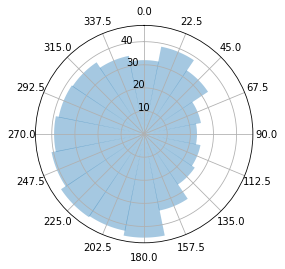

In [ ]:
# import matplotlib.pyplot as plt

# N = 16
# theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# label = [data18['풍향D'][0],data18['풍향D'][1],data18['풍향D'][2],data18['풍향D'][3],data18['풍향D'][4],data18['풍향D'][5],data18['풍향D'][6],data18['풍향D'][7],data18['풍향D'][8],data18['풍향D'][9],data18['풍향D'][10],data18['풍향D'][11],data18['풍향D'][12],data18['풍향D'][13],data18['풍향D'][14],data18['풍향D'][15]]
# #label = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "l", "m", "n", "o", "p"]
# val = [data18['mean_미세먼지'][0],data18['mean_미세먼지'][1],data18['mean_미세먼지'][2],data18['mean_미세먼지'][3],data18['mean_미세먼지'][4],data18['mean_미세먼지'][5],data18['mean_미세먼지'][6],data18['mean_미세먼지'][7],data18['mean_미세먼지'][8],data18['mean_미세먼지'][9],data18['mean_미세먼지'][10],data18['mean_미세먼지'][11],data18['mean_미세먼지'][12],data18['mean_미세먼지'][13],data18['mean_미세먼지'][14],data18['mean_미세먼지'][15]]
# #colors = plt.cm.virdis(val/2)
# #val = np.array([0.9928, 0.9854, 0.9829, 0.9794, 0.9727, 0.9698, 0.9657, 0.9641, 0.9651, 0.9482, 0.9557, 0.9404, 0.9360, 0.9270, 0.9253, 0.9000])
# ax = plt.subplot(projection='polar') ## 그래프 그리기 및 그래프 형식 지정
# #ax.bar(direcr, val, width=0.5, bottom=0, color=colors, alpha=0.4) ## 막대그래프 표현
# ax.set_theta_zero_location('N') ## 시작점 북쪽을 위로
# ax.set_theta_direction(-1) ## 시계방향으로 그래프 그리기
# #ax.set_rticks(np.arange(0.94, 1, 0.02))
# ax.set_thetagrids(theta * 180 / np.pi)
# ax.set_rlabel_position(-15)

# ax.bar(x=theta, height=val, width=0.4, bottom=0, alpha=0.4, tick_label=label) ## 막대그래프 표현

# plt.show()

In [ ]:
# import plotly.graph_objects as go
# r0 = []
# r1 = []
# r2 = []
# theta0 = []
# theta1 = []
# theta2 = []
# for i in len(data18['mean_미세먼지']):
#   if data18['mean_미세먼지'][i] < 30:
#     theta0.append(data18['풍향D'][i])
#     r0.append(data18['mean_미세먼지'])
#     marker_color0= '#B6FFB4'

#   elif data18['mean_미세먼지'][i] >=30 and data18['mean_미세먼지'][i] <=35:
#     theta1.append(data18['풍향D'][i])
#     r1.append(data18['mean_미세먼지'])
#     marker_color1 = '#FFDF70'
#   else:
#     theta2.append(data18['풍향D'][i])
#     r2.append(data18['mean_미세먼지'])
#     marker_color2 = '#FFAA70'
# fig = go.Figure(go.Barpolar(
#     r = [data18['mean_미세먼지'][0],data18['mean_미세먼지'][1],data18['mean_미세먼지'][2],data18['mean_미세먼지'][3],data18['mean_미세먼지'][4],data18['mean_미세먼지'][5],data18['mean_미세먼지'][6],data18['mean_미세먼지'][7],data18['mean_미세먼지'][8],data18['mean_미세먼지'][9],data18['mean_미세먼지'][10],data18['mean_미세먼지'][11],data18['mean_미세먼지'][12],data18['mean_미세먼지'][13],data18['mean_미세먼지'][14],data18['mean_미세먼지'][15]],
#     theta = [0,22.5,45,67.5,90,112.5,135, 157.5,180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5 ],
#     #base = '0',
#     #tick = [],
#     #name = '2018',
#     # = [data18['풍향D'][0],data18['풍향D'][1],data18['풍향D'][2],data18['풍향D'][3],data18['풍향D'][4],data18['풍향D'][5],data18['풍향D'][6],data18['풍향D'][7],data18['풍향D'][8],data18['풍향D'][9],data18['풍향D'][10],data18['풍향D'][11],data18['풍향D'][12],data18['풍향D'][13],data18['풍향D'][14],data18['풍향D'][15]],
#     marker_color=marker_color0,
#     marker_line_color="black",
#     marker_line_width=1,
#     opacity=0.8
# ))

# fig.update_layout(
#     title='2018',
#     showlegend=True,
#     polar_angularaxis_rotation=90,
#     template=None,
    
#     polar = dict(
       
#         radialaxis = dict(range=[0, 45], showticklabels=True, ticks='inside'),
#         angularaxis = dict(showticklabels=True,  direction = 'clockwise',ticks='outside')
#     )
# )

# fig.show()

In [ ]:
# import plotly.express as px
  
# # using the wind dataset
# df = px.data.wind()
  
# fig = px.bar_polar(df, r="strength", theta="direction",
#                    color="frequency",)
# fig.show()

0
1
2
3
4


In [ ]:
data18r0 = []
data18r1 = []
data18r2 = []
data18r3 = []
data18theta0 = []
data18theta1 = []
data18theta2 = []
data18theta3 = []
for i in range(len(data18['mean_미세먼지'])):
  if data18['mean_미세먼지'][i] <= 15:
    data18theta0.append(data18['풍향D'][i])
    data18r0.append(data18['mean_미세먼지'][i])
    
  elif data18['mean_미세먼지'][i] >15 and data18['mean_미세먼지'][i] <=35:
    data18theta1.append(data18['풍향D'][i])
    data18r1.append(data18['mean_미세먼지'][i])

  elif data18['mean_미세먼지'][i] >35 and data18['mean_미세먼지'][i] <=75:
    data18theta2.append(data18['풍향D'][i])
    data18r2.append(data18['mean_미세먼지'][i])

  else:
    data18theta3.append(data18['풍향D'][i])
    data18r3.append(data18['mean_미세먼지'][i])
print(data18theta0)
print(data18theta1)
print(data18theta2)
print(data18theta3)

print(data18r0)  


[]
[0.0, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 337.5]
[22.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0]
[]
[]


In [ ]:
data19r0 = []
data19r1 = []
data19r2 = []
data19r3 = []
data19theta0 = []
data19theta1 = []
data19theta2 = []
data19theta3 = []
for i in range(len(data19['mean_미세먼지'])):
  if data19['mean_미세먼지'][i] <= 15:
    data19theta0.append(data19['풍향D'][i])
    data19r0.append(data19['mean_미세먼지'][i])
    
  elif data19['mean_미세먼지'][i] >15 and data19['mean_미세먼지'][i] <=35:
    data19theta1.append(data19['풍향D'][i])
    data19r1.append(data19['mean_미세먼지'][i])

  elif data19['mean_미세먼지'][i] >35 and data19['mean_미세먼지'][i] <=75:
    data19theta2.append(data19['풍향D'][i])
    data19r2.append(data19['mean_미세먼지'][i])

  else:
    data19theta3.append(data19['풍향D'][i])
    data19r3.append(data19['mean_미세먼지'][i])
print(data19theta0)
print(data19theta1)
print(data19theta2)
print(data19theta3)
print(data19r1)  


[]
[0.0, 67.5, 90.0, 112.5]
[22.5, 45.0, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5]
[]
[34.661432452644476, 34.4723544995336, 32.48672066164723, 33.619184573002755]


In [ ]:
data20r0 = []
data20r1 = []
data20r2 = []
data20r3 = []
data20theta0 = []
data20theta1 = []
data20theta2 = []
data20theta3 = []
for i in range(len(data20['mean_미세먼지'])):
  if data20['mean_미세먼지'][i] <= 15:
    data20theta0.append(data20['풍향D'][i])
    data20r0.append(data20['mean_미세먼지'][i])
    
  elif data20['mean_미세먼지'][i] >15 and data20['mean_미세먼지'][i] <=35:
    data20theta1.append(data20['풍향D'][i])
    data20r1.append(data20['mean_미세먼지'][i])

  elif data20['mean_미세먼지'][i] >35 and data20['mean_미세먼지'][i] <=75:
    data20theta2.append(data20['풍향D'][i])
    data20r2.append(data20['mean_미세먼지'][i])

  else:
    data20theta3.append(data20['풍향D'][i])
    data20r3.append(data20['mean_미세먼지'][i])
print(data20theta0)
print(data20theta1)
print(data20theta2)
print(data20theta3)
print(data20r1)  

[]
[67.5]
[0.0, 22.5, 45.0, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5]
[]
[32.59161306889287]


In [ ]:
data21r0 = []
data21r1 = []
data21r2 = []
data21r3 = []
data21theta0 = []
data21theta1 = []
data21theta2 = []
data21theta3 = []
for i in range(len(data21['mean_미세먼지'])):
  if data21['mean_미세먼지'][i] <= 15:
    data21theta0.append(data21['풍향D'][i])
    data21r0.append(data21['mean_미세먼지'][i])
    
  elif data21['mean_미세먼지'][i] >15 and data21['mean_미세먼지'][i] <=35:
    data21theta1.append(data21['풍향D'][i])
    data21r1.append(data21['mean_미세먼지'][i])

  elif data21['mean_미세먼지'][i] >35 and data21['mean_미세먼지'][i] <=75:
    data21theta2.append(data21['풍향D'][i])
    data21r2.append(data21['mean_미세먼지'][i])

  else:
    data21theta3.append(data21['풍향D'][i])
    data21r3.append(data21['mean_미세먼지'][i])

print(data21theta0)
print(data21theta1)
print(data21theta2)
print(data21theta3)

print(data21r2)  

[]
[]
[0.0, 22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 247.5, 270.0, 292.5, 315.0, 337.5]
[225.0]
[50.01132899113082, 49.679244313956616, 36.50984702656143, 36.814002679231336, 35.23489555323569, 35.94843049327354, 37.779310344827586, 44.6460343919986, 58.00755522706742, 59.90476632685055, 63.37253243830614, 51.025408115982394, 47.77505107904482, 42.35944645006017, 40.27884615384615]


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=2, cols=2,
    specs = [[{'type': 'polar'}]*2,[{'type': 'polar'}]*2],
    subplot_titles = ('2018', '2019', '2020', '2021'),
    
    
   
)
# 2018
fig.add_trace(go.Barpolar(
    
    r = data18r0,
    theta = data18theta0,
    #base = '0',
    #tick = [],
    #name = '2018',
    # = [data18['풍향D'][0],data18['풍향D'][1],data18['풍향D'][2],data18['풍향D'][3],data18['풍향D'][4],data18['풍향D'][5],data18['풍향D'][6],data18['풍향D'][7],data18['풍향D'][8],data18['풍향D'][9],data18['풍향D'][10],data18['풍향D'][11],data18['풍향D'][12],data18['풍향D'][13],data18['풍향D'][14],data18['풍향D'][15]],
    marker_color='#B6FFB4',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    name = '~15㎍/㎥'), row=1, col=1,
    
)
fig.add_trace(go.Barpolar(
    r = data18r1,
    theta = data18theta1,
    marker_color = '#FFDF70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    name = '15~35㎍/㎥'
),row=1, col=1,

)
fig.add_trace(go.Barpolar(
    r = data18r2,
    theta = data18theta2,
    marker_color = '#FFAA70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    name= '35~75㎍/㎥'),
    row=1, col=1

)
fig.add_trace(go.Barpolar(
    r = data18r3,
    theta = data18theta3,
    marker_color = '#8B0000',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    name= '75~㎍/㎥'),
    row=1, col=1

)
#2019
fig.add_trace(go.Barpolar(
    r = data19r0,
    theta = data19theta0,
    showlegend=False,
    #base = '0',
    #tick = [],
    #name = '2018',
    # = [data18['풍향D'][0],data18['풍향D'][1],data18['풍향D'][2],data18['풍향D'][3],data18['풍향D'][4],data18['풍향D'][5],data18['풍향D'][6],data18['풍향D'][7],data18['풍향D'][8],data18['풍향D'][9],data18['풍향D'][10],data18['풍향D'][11],data18['풍향D'][12],data18['풍향D'][13],data18['풍향D'][14],data18['풍향D'][15]],
    marker_color='#B6FFB4',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    ), row=1, col=2
)
fig.add_trace(go.Barpolar(
    r = data19r1,
    theta = data19theta1,
    showlegend=False,
    marker_color = '#FFDF70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    
),row=1, col=2
)
fig.add_trace(go.Barpolar(
    r = data19r2,
    theta = data19theta2,
    showlegend=False,
    marker_color = '#FFAA70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
   ),
    row=1, col=2

)
fig.add_trace(go.Barpolar(
    r = data19r3,
    theta = data19theta3,
    marker_color = '#8B0000',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    name= '75~㎍/㎥'),
    row=1, col=2

)
# 20
fig.add_trace(go.Barpolar(
    r = data20r0,
    theta = data20theta0,
    showlegend=False,
    #base = '0',
    #tick = [],
    #name = '2018',
    # = [data18['풍향D'][0],data18['풍향D'][1],data18['풍향D'][2],data18['풍향D'][3],data18['풍향D'][4],data18['풍향D'][5],data18['풍향D'][6],data18['풍향D'][7],data18['풍향D'][8],data18['풍향D'][9],data18['풍향D'][10],data18['풍향D'][11],data18['풍향D'][12],data18['풍향D'][13],data18['풍향D'][14],data18['풍향D'][15]],
    marker_color='#B6FFB4',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    ), row=2, col=1
)
fig.add_trace(go.Barpolar(
    r = data20r1,
    theta = data20theta1,
    showlegend=False,
    marker_color = '#FFDF70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    
),row=2, col=1
)
fig.add_trace(go.Barpolar(
    r = data20r2,
    theta = data20theta2,
    showlegend=False,
    marker_color = '#FFAA70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    ),
    row=2, col=1

)
fig.add_trace(go.Barpolar(
    r = data20r3,
    theta = data20theta3,
    marker_color = '#8B0000',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    name= '75~㎍/㎥'),
    row=2, col=1

)
#21
fig.add_trace(go.Barpolar(
    r = data21r0,
    theta = data21theta0,
    showlegend=False,
    #base = '0',
    #tick = [],
    #name = '2018',
    # = [data18['풍향D'][0],data18['풍향D'][1],data18['풍향D'][2],data18['풍향D'][3],data18['풍향D'][4],data18['풍향D'][5],data18['풍향D'][6],data18['풍향D'][7],data18['풍향D'][8],data18['풍향D'][9],data18['풍향D'][10],data18['풍향D'][11],data18['풍향D'][12],data18['풍향D'][13],data18['풍향D'][14],data18['풍향D'][15]],
    marker_color='#B6FFB4',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    ), row=2, col=2
)
fig.add_trace(go.Barpolar(
    r = data21r1,
    theta = data21theta1,
    showlegend=False,
    marker_color = '#FFDF70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    
),row=2, col=2
)
fig.add_trace(go.Barpolar(
    r = data21r2,
    theta = data21theta2,
    showlegend=False,
    marker_color = '#FFAA70',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    ),
    row=2, col=2

)
fig.add_trace(go.Barpolar(
    r = data21r3,
    theta = data21theta3,
    marker_color = '#8B0000',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    name= '75~㎍/㎥'),
    row=2, col=2

)

fig.update_layout({'annotations': 
                   [{'font': {'size': 16},
                     'showarrow': False,
                     'text': '2018',
                     'x': 0.025,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yref': 'paper',
                     'yanchor': 'bottom'
                     },
                   {'font': {'size': 16},
                     'showarrow': False,
                     'text': '2019',
                     'x': 0.6,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yref': 'paper',
                     'yanchor': 'bottom'
                     },
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': '2020',
                     'x': 0.025,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.35,
                     'yref': 'paper',
                     'yanchor': 'bottom'
                     },
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': '2021',
                     'x': 0.6,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.35,
                     'yref': 'paper',
                     'yanchor': 'bottom'
                     }]},
    title='풍향별 미세먼지 농도',
    polar_angularaxis_rotation=90,
    template=None,
    height = 1000, width= 1000,
    
    polar = dict(
       
        radialaxis = dict(range=[0, 80], showticklabels=True, ticks='inside'),
        angularaxis = dict(showticklabels=True,  direction = 'clockwise',ticks='outside')
    
    ),
    polar2 = dict(
       
        radialaxis = dict(range=[0, 80], showticklabels=True, ticks='inside'),
        angularaxis = dict(showticklabels=True,  direction = 'clockwise',ticks='outside')
    
    ),
    polar3 = dict(
       
        radialaxis = dict(range=[0, 80], showticklabels=True, ticks='inside'),
        angularaxis = dict(showticklabels=True,  direction = 'clockwise',ticks='outside')
    
    ),
    polar4 = dict(
       
        radialaxis = dict(range=[0, 80], showticklabels=True, ticks='inside'),
        angularaxis = dict(showticklabels=True,  direction = 'clockwise',ticks='outside')
    
    )
)
    


fig.show()

In [ ]:
bin_2018[' pm10'][n], qing_2018[' pm10'][n], riz_2018[' pm10'][n], 

NameError: ignored

In [ ]:
import numpy
china_2018 = pd.DataFrame(columns = ['date', 'pm10'])
for n in range(len(bin_2018)['date']):
  date = bin_2018['date'][n]
  mean = numpy.mean[bin_2018[' pm10'][n],qing_2018[' pm10'][n],riz_2018[' pm10'][n],tai_2018[' pm10'][n],weif_2018[' pm10'][n],wei_2018[' pm10'][n],zao_2018[' pm10'][n],dez_2018[' pm10'][n],dong_2018[' pm10'][n],he_2018[' pm10'][n],ji_2018[' pm10'][n],jin_2018[' pm10'][n],liao_2018[' pm10'][n],li_2018[' pm10'][n],ya_2018[' pm10'][n],zi_2018][' pm10'][n])
  china_2018.loc[n] = [date, mean]

In [ ]:
import pandas as pd
df=pd.DataFrame(columns = ['date', 'mean']) 
df.loc[1] = [1,2]
#df = df.append(['date': '5', 'mean': '5'])
print(df)

  date mean
1    1    2


In [ ]:
df.loc[2]=[1,4]

In [ ]:
df.loc[3] = [1,5]
print(df)

  date mean
1    1    2
2    1    4
3    1    5


In [ ]:
len(df['date'])

3